In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

In [2]:
flask_meas_path = '/net/fluo/data2/groupMembers/cchristo/flask_measurments/summit/'

In [63]:
def preprocess_flask_meas(df):
    df['datetime'] = pd.to_datetime(df[1].astype(str)+'-'+df[2].astype(str)+'-'+ df[3].astype(str))
    df = df.set_index('datetime')
    # subset in time 
    df = df.loc['2011-01-01':'2016-01-01']
    df = df[(~df[13].str.contains('N..')) & (abs(df[12]) < 1)]
    return df

In [65]:
co2_meas = pd.read_csv(flask_meas_path + 'co2_sum_surface-flask_1_ccgg_event.txt',
#                        sep= ' ',
                       delim_whitespace=True,
                       skiprows= list(range(70)), header = None)
co2_meas = preprocess_flask_meas(co2_meas)
ch4_meas = pd.read_csv(flask_meas_path + 'ch4_sum_surface-flask_1_ccgg_event.txt',
           delim_whitespace=True,
           skiprows= list(range(70)), header = None)
ch4_meas = preprocess_flask_meas(ch4_meas)

In [59]:
df = co2_meas.copy()


(380.0, 410.0)

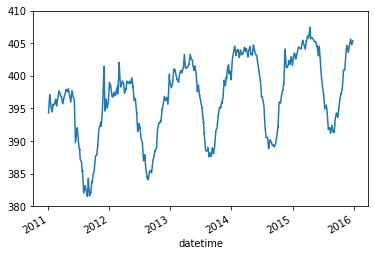

In [66]:
co2_meas[11].plot()
plt.ylim([380, 410])

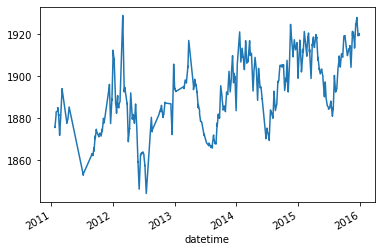

In [67]:
ch4_meas[11].plot()